# Plotting brain region values on histology slices

This example walks through various ways to overlay brain region values on histology slices

## Data preparation
For all the examples below, an array of acronyms and an array of values corresponding to each acronym must be provided. 

In [1]:
import numpy as np
# prepare array of acronyms
acronyms = np.array(['VPM', 'VPL', 'PO', 'LP', 'CA1', 'DG-mo', 'SSs5', 'VISa5', 'AUDv6a', 'MOp5', 'FRP5'])
# assign data to each acronym
values = np.arange(len(acronyms))

# acronyms and values must have the same number of rows
assert (acronyms.size == values.size)

If different values for each acronym want to be shown on each hemisphere, the array of values must contain two columns, the first corresponding to values on the left hemisphere and the second corresponding to values on the right hemisphere

In [2]:
# values to be used for left and right hemisphere
values_lh = np.random.randint(0, 10, acronyms.size)
values_rh = np.random.randint(0, 10, acronyms.size)
values_lr = np.c_[values_lh, values_rh]

When providing values for each hemisphere, if a value for a given acronym has only been computed, for example, in the left hemisphere, the corresponding value in right hemisphere array should be set to NaN. A helper function is available that will prepare the array of values in the correct format

In [3]:
from iblatlas.plots import prepare_lr_data

acronyms_lh = np.array(['VPM', 'VPL', 'PO', 'LP', 'CA1', 'DG-mo'])
values_lh = np.random.randint(0, 10, acronyms_lh.size)

acronyms_rh = np.array(['VPM', 'PO', 'LP', 'CA1', 'DG-mo', 'VISa5', 'SSs5'])
values_rh = np.random.randint(0, 10, acronyms_rh.size)

acronyms_lr, values_lr = prepare_lr_data(acronyms_lh, values_lh, acronyms_rh, values_rh)

Different mappings can be used when plotting the images (see [here](https://int-brain-lab.github.io/iblenv/notebooks_external/atlas_mapping.html) for more information on atlas mappings). The acronyms provided must correspond to the specified map

In [4]:
from iblatlas.regions import BrainRegions
br = BrainRegions()

acronyms_beryl = np.unique(br.acronym2acronym(acronyms, mapping='Beryl'))
values_beryl = np.arange(acronyms_beryl.size)

acronyms_cosmos = np.unique(br.acronym2acronym(acronyms, mapping='Cosmos'))
values_cosmos = np.arange(acronyms_cosmos.size)

## Example 1: Coronal slices

In [5]:
from iblatlas.plots import plot_scalar_on_slice
from iblatlas.atlas import AllenAtlas
ba = AllenAtlas()

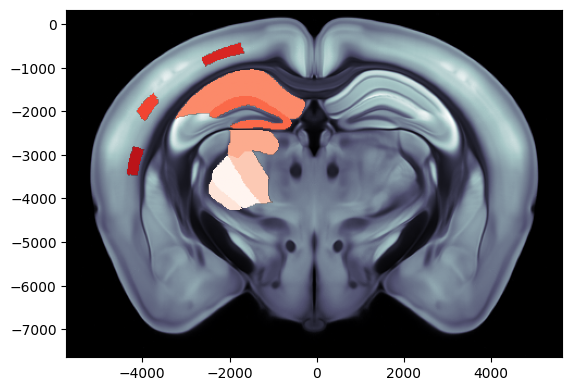

In [6]:
# Plot region values on the left hemisphere of a coronal slice at ap=-2000um overlaid on the dwi Allen image
fig, ax = plot_scalar_on_slice(acronyms, values, coord=-2000, slice='coronal', mapping='Allen', hemisphere='left',
                               background='image', cmap='Reds', brain_atlas=ba)

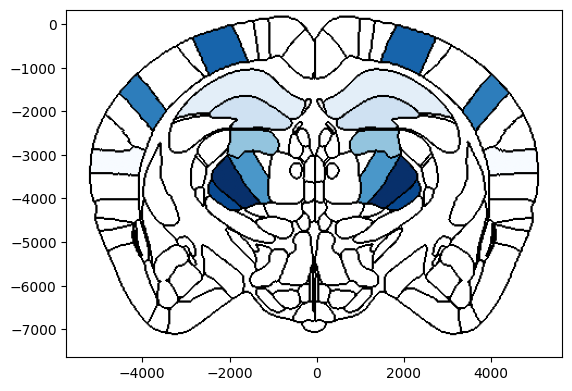

In [7]:
# Plot single column region values on both hemispheres of a coronal slice at ap=-2000um overlaid on brain region boundaries
# using Beryl mapping
# If values only contains one column, the values will be mirrored on each hemisphere
fig, ax = plot_scalar_on_slice(acronyms_beryl, values_beryl, coord=-2000, slice='coronal', mapping='Beryl', 
                               hemisphere='both', background='boundary', cmap='Blues', brain_atlas=ba)

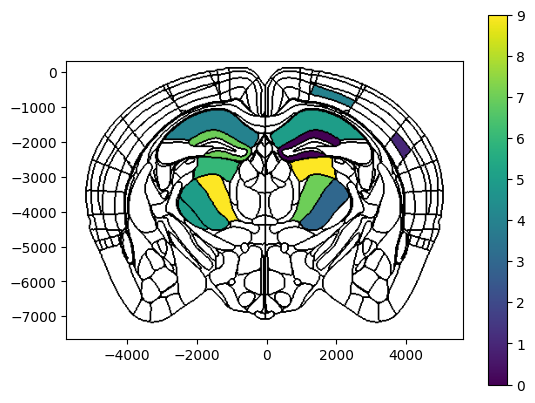

In [8]:
# Plot two column region values on both hemispheres of a coronal slice at ap=-1800um overlaid on brain region boundaries
# and display colorbar
# Values contains two columns, so each hemisphere has different values 
fig, ax, cbar = plot_scalar_on_slice(acronyms_lr, values_lr, coord=-1800, slice='coronal', mapping='Allen', hemisphere='both', 
                               background='boundary', cmap='viridis', brain_atlas=ba, show_cbar=True)

## Example 2: Sagittal slices

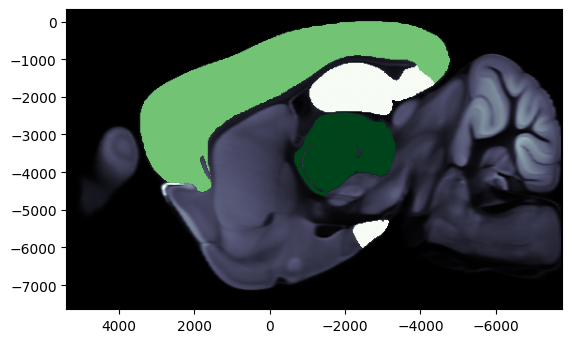

In [9]:
# Plot region values on the left hemisphere of a sagittal slice at ml=-2000um overlaid on the dwi Allen image 
# using cosmos mapping
fig, ax = plot_scalar_on_slice(acronyms_cosmos, values_cosmos, coord=-2000, slice='sagittal', mapping='Cosmos', 
                               hemisphere='left', background='image', cmap='Greens', brain_atlas=ba)

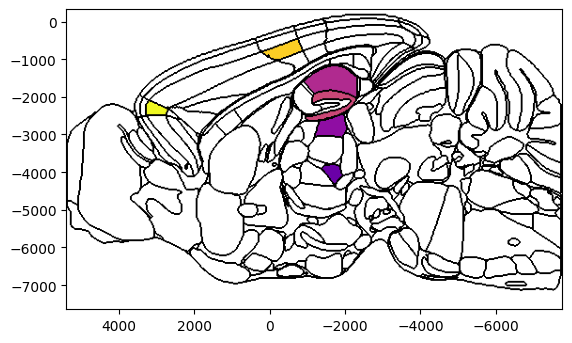

In [10]:
# Plot region values on the left hemisphere of a sagittal slice at ml=-1000um overlaid on brain region boundaries
# Create figure before and pass in axis on which to plot
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
fig, ax = plot_scalar_on_slice(acronyms, values, coord=-1000, slice='sagittal', mapping='Allen', hemisphere='left', 
                               background='boundary', cmap='plasma', brain_atlas=ba, ax=ax)

## Example 3: Horizontal slices

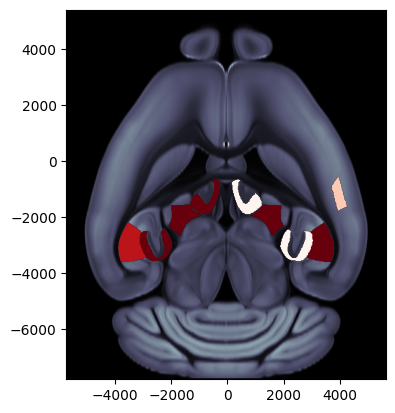

In [11]:
# Plot two column region values on the both hemispheres of a horizontal slice at dv=--2500um overlaid on the dwi Allen image
# Pass in clevels min max values to cap the colormap
fig, ax = plot_scalar_on_slice(acronyms_lr, values_lr, coord=-2500, slice='horizontal', mapping='Allen', hemisphere='both', 
                               background='image', cmap='Reds', brain_atlas=ba, clevels=[0, 5])

## Example 4: Top view

/opt/hostedtoolcache/Python/3.12.9/x64/lib/python3.12/site-packages/iblatlas/atlas.py:172: RuntimeWarning: invalid value encountered in cast
  ii = np.array(np.round(i)).astype(int)


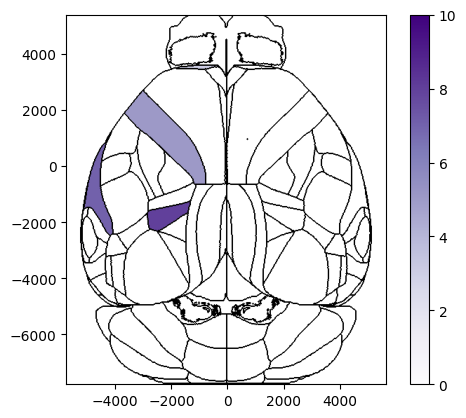

In [12]:
# Plot region values on left hemisphere of a top view overlaid on brain region boundaries using Beryl mapping and show cbar

fig, ax, cbar = plot_scalar_on_slice(acronyms_beryl, values_beryl, slice='top', mapping='Beryl', hemisphere='left', 
                                     background='boundary', cmap='Purples', brain_atlas=ba, show_cbar=True)